In [1]:
%matplotlib widget

## Calibration of camera geometry

This calibration is performed using pyfai library. It generates a *.poni file that contains all required information for further data processing.

Note that beam center is automatically recalibrated before image processing. Distance and camera roation angles are assumed constant.

In [2]:
from calibration import perform_geometric_calibration
datapath = '/home-local/ratel-ra/Documents/ePDF_project/TEM_data/JEM_200/starter_kit/'
sample_diff_calib = datapath + "80X_Metro_200kV_0890.dm4" # Au calibrant diffraction data
# path to Au cif file used for calibration
cif_file = "/home-local/ratel-ra/Documents/CIF_database/Au_fixed.cif"

#perform_geometric_calibration(
#    image_file=sample_diff_calib,
#    cif_file = cif_file)

## Create instance of SAEDProcessor

An instance is intialized with the following args:
- dm4_file: str path to SAED diffraction image 
- poni_file:str path to poni calibration file
- beamstop: bool indicates the presence of beamstop on diffraction image (impact on the procedure used to recalibrate the data)
- verbose: bool prints metadata

In [3]:
from ePDFsuite import SAEDProcessor

datapath = '/home-local/ratel-ra/Documents/ePDF_project/TEM_data/JEM_200/starter_kit/'
sample_diff = datapath + "80X_Metro_200kV_0925.dm4" # Au film diffraction data

poni_file = './calibration_default_topleft.poni'  # PONI file obtained from calibration step

proc = SAEDProcessor(sample_diff,
                     poni_file=None,
                     beamstop=False,
                     verbose=True)


Loaded file: /home-local/ratel-ra/Documents/ePDF_project/TEM_data/JEM_200/starter_kit/80X_Metro_200kV_0925.dm4
Sample information:
  binning: 1
  description: Gatan 80X Metro direct electron detector
  image_height: 2048
  image_width: 2048
  pixel_size: 5
  camera_type: Gatan 80X Metro
  camera_title: 80X_Metro_200kV_0925
  wavelength: 0.025079340450548007
  exposure_time: 120.00056385295466
scale = 0.02037624642252922, unit = 1/nm


**Plot 2D data**

plot normalizes data. 

Intensity scale is asjusted through $10^{v_{min}}$ and $10^{v_{max}}$.

Defaut values are $v_{min} = -4, v_{max} =0$

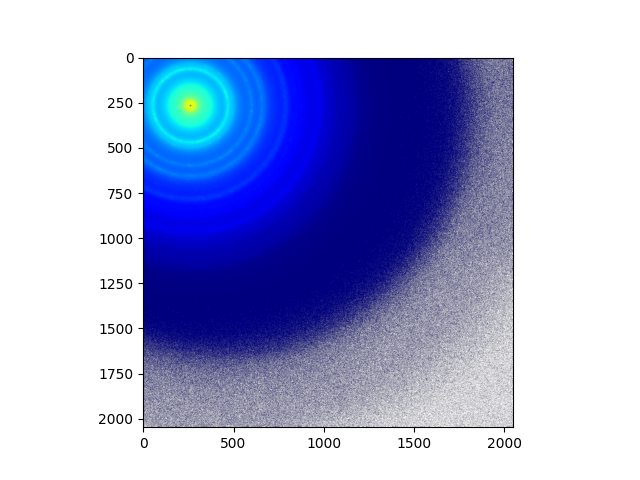

In [4]:
proc.plot(vmin=-4, vmax=1,cmap='jet')

**Integrate**

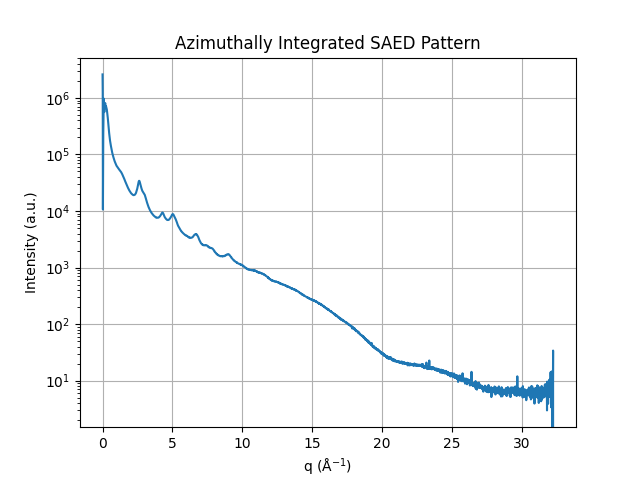

In [5]:
q,i = proc.integrate(plot=True) # here q = 2pi*k 

**Extract PDF**

1/ automatic mode (default parameters)

Compute PDF with default parameters


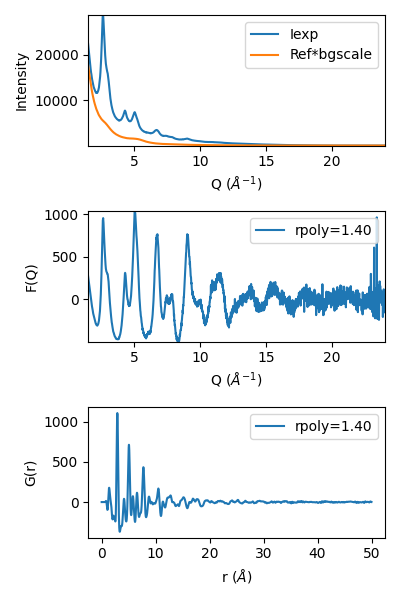

PDF saved to Au_NPs_epdf.gr


(array([0.000e+00, 1.000e-02, 2.000e-02, ..., 4.998e+01, 4.999e+01,
        5.000e+01]),
 array([ 0.        , -0.01556638, -0.0311319 , ...,  1.30337942,
         1.3544836 ,  1.45763318]))

In [6]:
ref_diff = datapath+ '80X_Metro_200kV_0912.dm4' # amorphous C grid diffraction data

proc.extract_epdf(
    ref_diffraction_image=ref_diff,
    composition = 'Au',                     
    rmin=0.1,
    rmax=50.0,
    rstep=0.01,
    interactive = False,
    plot = True,
    outputfile = 'Au_NPs_epdf.gr')

2/ Interactive mode

In [16]:
proc.extract_epdf(
    ref_diffraction_image=ref_diff,
    composition = 'Au',                     
    rmin=0.1,
    rmax=50.0,
    rstep=0.01,
    interactive = True,
    outputfile = 'Au_NPs_epdf_pyfai=True.gr')

Adjust sliders to optimize PDF parameters. Click "Save" to export results.


**Impact of camera calibration**

The following test is performed to evaluate the impact of camera calibration with pyFAI. Remember that beam center is ALWAYS recalibrated. The pruporse of pyFAI calibration is to account for camera distortion.
Here we use data from the Au film

scale = 0.02037624642252922, unit = 1/nm


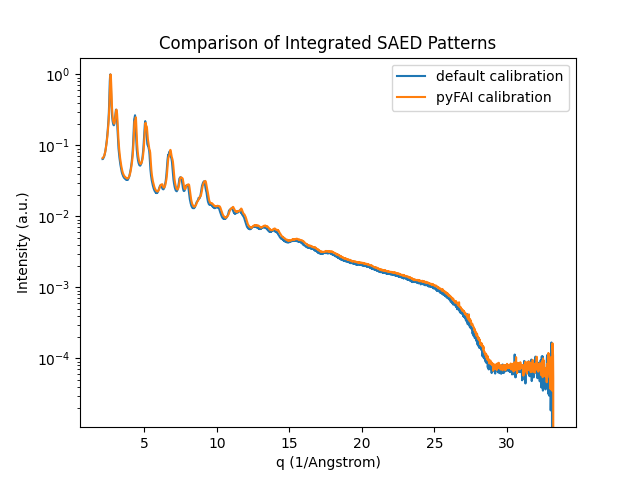

In [8]:
from matplotlib import pyplot as plt
import numpy as np
datapath = '/home-local/ratel-ra/Documents/ePDF_project/TEM_data/JEM_200/starter_kit/'
sample_diff = datapath + "80X_Metro_200kV_0890.dm4" # Au film diffraction data

poni_file = './calibration_default_topleft.poni'  # PONI file obtained from calibration step

proc_poni = SAEDProcessor(sample_diff,
                     poni_file=poni_file,
                     beamstop=False,
                     verbose=False)

q_poni,I_poni = proc_poni.integrate(plot=False) # here q = 2pi*k

proc = SAEDProcessor(sample_diff,
                     poni_file=None,
                     beamstop=False,
                     verbose=False)
q, I = proc.integrate(plot=False) # here q = 2pi*k
mask = q>2.11
mask_poni = q_poni>2.11

normalize = True
I = I[mask]
q = q[mask]
q_poni = q_poni[mask_poni]
I_poni = I_poni[mask_poni]
if normalize:
    I /= I.max()
    I_poni /= I_poni.max()

plt.figure()
plt.semilogy(q, I, label='default calibration')
plt.semilogy(q_poni, I_poni, label='pyFAI calibration')
plt.xlabel('q (1/Angstrom)')
plt.ylabel('Intensity (a.u.)')
plt.title('Comparison of Integrated SAED Patterns')
plt.legend()


**Impact on PDF**

Compute PDF with default parameters
PDF saved to /home-local/ratel-ra/Documents/ePDF_project/TEM_data/JEM_200/starter_kit/80X_Metro_200kV_0890_pdf.gr
Compute PDF with default parameters
PDF saved to /home-local/ratel-ra/Documents/ePDF_project/TEM_data/JEM_200/starter_kit/80X_Metro_200kV_0890_pdf.gr


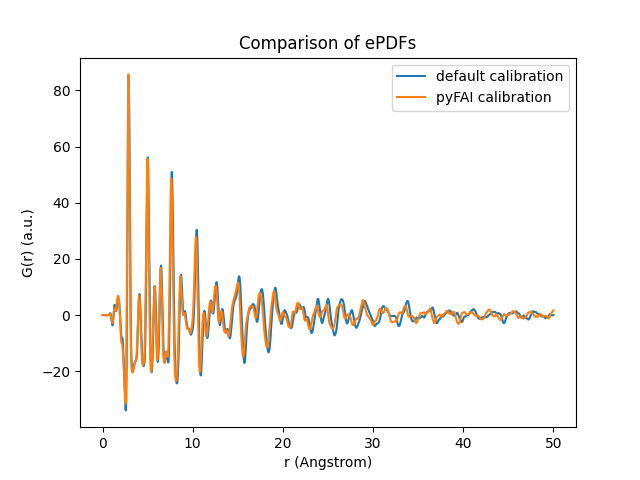

In [9]:
r,g = proc.extract_epdf(
    ref_diffraction_image=ref_diff,
    composition = 'Au',                     
    rmin=0.1,
    rmax=50.0,
    rstep=0.01,
    interactive = False,
    plot = False)

r_poni,g_poni = proc_poni.extract_epdf(
    ref_diffraction_image=ref_diff,
    composition = 'Au',                     
    rmin=0.1,
    rmax=50.0,
    rstep=0.01,
    interactive = False,
    plot = False)   

plt.figure()
plt.plot(r, g, label='default calibration')
plt.plot(r_poni, g_poni, label='pyFAI calibration')
plt.xlabel('r (Angstrom)')
plt.ylabel('G(r) (a.u.)')
plt.title('Comparison of ePDFs')
plt.legend()

Mean absolute error in peak positions: 0.0817 Angstrom
Mean relative error in peak positions: 0.8343 %


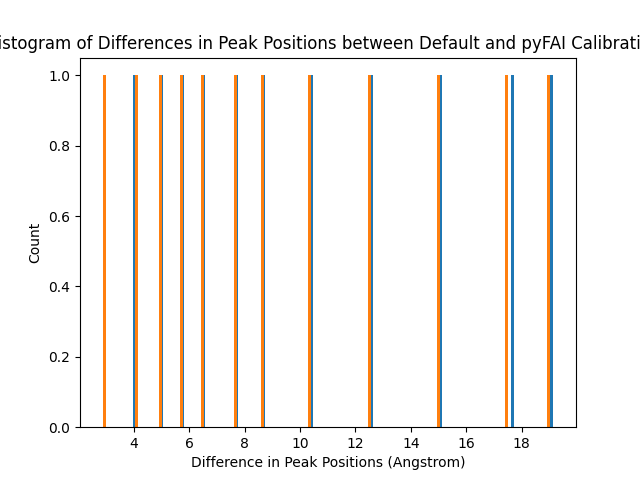

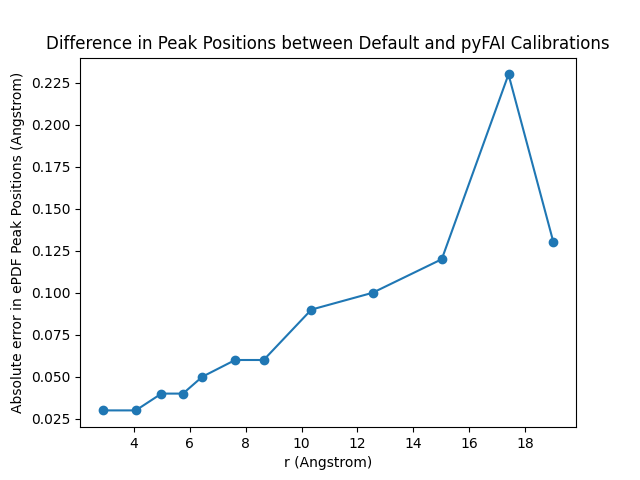

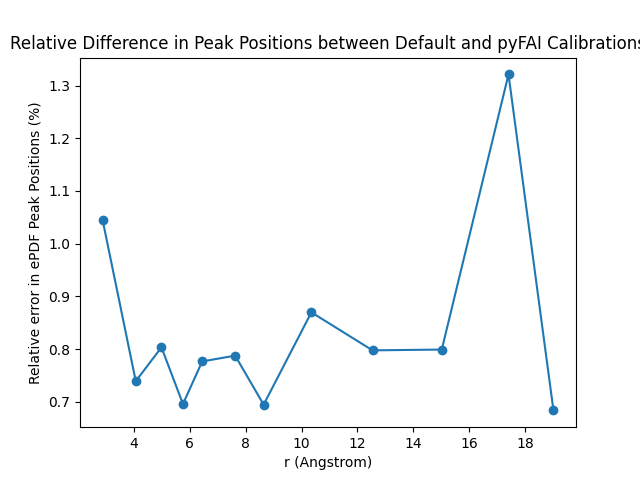

In [10]:
# identification of peaks in the ePDFs
from scipy.signal import find_peaks

height = 0.07
peaks, _ = find_peaks(g/g.max(), height=height)
peaks_poni, _ = find_peaks(g_poni/g_poni.max(), height=height)
# on ne garde que les pics qui sont proches dans les 2 tableaux
tolerance = 0.26 # r resolution of the ePDF
matched_peaks = []
for i, peak in enumerate(peaks):
    for j, peak_poni in enumerate(peaks_poni):
        if abs(r[peak] - r_poni[peak_poni]) < tolerance:
            matched_peaks.append((peak, peak_poni))
            break
differences = [r[peak] - r_poni[peak_poni] for peak, peak_poni in matched_peaks]
rplot = [r_poni[peak_poni] for _, peak_poni in matched_peaks]
r_peaks, r_peaks_poni = [r[peak] for peak, _ in matched_peaks], [r_poni[peak_poni] for _, peak_poni in matched_peaks]
# plot matched peaks positions as histogram
plt.figure()

plt.hist(r_peaks, bins=150, alpha=1, label='default calibration')
plt.hist(r_peaks_poni, bins=150, alpha=1, label='pyFAI calibration')
plt.xlabel('Difference in Peak Positions (Angstrom)')
plt.ylabel('Count')
plt.title('Histogram of Differences in Peak Positions between Default and pyFAI Calibrations')

# plot absolute error between peaks positions as a function of r
plt.figure()

plt.plot(rplot, differences, '-o')
plt.xlabel('r (Angstrom)')
plt.ylabel('Absolute error in ePDF Peak Positions (Angstrom)')
plt.title('Difference in Peak Positions between Default and pyFAI Calibrations')
 
# plot relative error between peaks positions as a function of r
error = []
for i in range(len(matched_peaks)):
    peak, peak_poni = matched_peaks[i]
    error.append(abs(r[peak] - r_poni[peak_poni])/r_poni[peak_poni])
plt.figure()
plt.plot(rplot, [e*100 for e in error], '-o')
plt.xlabel('r (Angstrom)')
plt.ylabel('Relative error in ePDF Peak Positions (%)')
plt.title('Relative Difference in Peak Positions between Default and pyFAI Calibrations')

print(f'Mean absolute error in peak positions: {np.mean(np.abs(differences)):.4f} Angstrom')
print(f'Mean relative error in peak positions: {np.mean([e*100 for e in error]):.4f} %')    


The error introduced by not accounting for camera distortion increases with r values. 
Camera distortion calibration should therefore be included in the data reduction pipeline, particularly when considering large structures/particles. 

The absolute error should be compared with PDF resoultion $\delta r = \frac {2\pi}{q_{max}}$, around $0.26\AA$.

Relative error remains below 1%.

Default calibration might be satisfactory for small particles. Neverthelless, this conclusion is true **for this experimental setup only**. It should be recommended to perform this comparative test for each experimental setup.

**Test ePDF extarction from mutlple images**

In [11]:
import glob,os
datapath = '/home-local/ratel-ra/Documents/ePDF_project/TEM_data/JEM_200/starter_kit/'
imagelist = []
numbers = [923,925]
for number in numbers:
    imagelist.append(os.path.join(datapath, f'80X_Metro_200kV_{number:04d}.dm4'))
print(imagelist)

['/home-local/ratel-ra/Documents/ePDF_project/TEM_data/JEM_200/starter_kit/80X_Metro_200kV_0923.dm4', '/home-local/ratel-ra/Documents/ePDF_project/TEM_data/JEM_200/starter_kit/80X_Metro_200kV_0925.dm4']


In [ ]:
from ePDFsuite import extract_ePDF_from_mutliple_files


ref_diff = datapath+ '80X_Metro_200kV_0912.dm4' # amorphous C grid diffraction data



extract_ePDF_from_mutliple_files(
                dm4_files=imagelist,
                ref_diffraction_image=ref_diff,
                 composition = 'Au',                     
                 rmin=0.1,
                 rmax=50.0,
                 rstep=0.01,
                 interactive = True,
                 plot = True,
                 outputfile = 'Au_NPs_epdf_multiple.gr')

scale = 0.02037624642252922, unit = 1/nm
scale = 0.02037624642252922, unit = 1/nm
Adjust sliders to optimize PDF parameters. Click "Save" to export results.


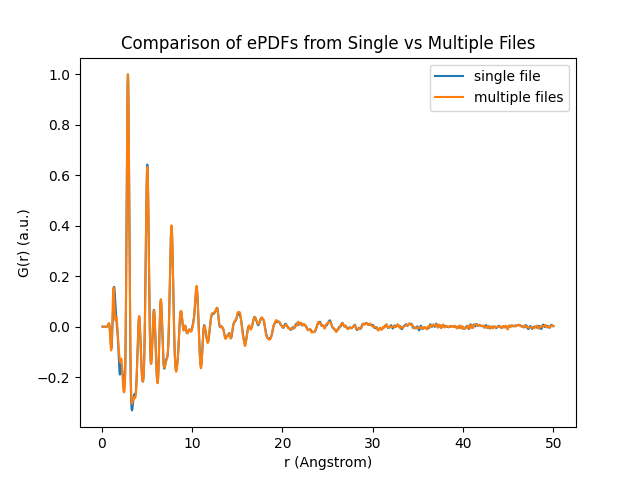

In [15]:
# Comparaison single file vs mutliple files

rsingle, gsingle = np.loadtxt('Au_NPs_epdf_pyfai=False.gr', unpack=True,skiprows=27)
rmultiple, gmultiple = np.loadtxt('Au_NPs_epdf_multiple.gr', unpack=True,skiprows=27)

plt.figure()
plt.plot(rsingle, gsingle/gsingle.max(), label='single file')
plt.plot(rmultiple, gmultiple/gmultiple.max(), label='multiple files')
plt.xlabel('r (Angstrom)')
plt.ylabel('G(r) (a.u.)')
plt.title('Comparison of ePDFs from Single vs Multiple Files')
plt.legend()